In [20]:
import numpy as np
import pandas as pd
import datasets
from sentence_transformers import SentenceTransformer
import torch
import torch.nn as nn
import torch.optim as optim
import os
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from IPython.display import Image, display

## Evaluating MLP

Model performance metrics based on report outputs from train_sentiment_mlp_classifier.py
Loss shown in the graphs below, macro f1 exact score reported here

Test Macro F1 Score: 0.6689

Classification Report:
              precision    recall  f1-score   support

    Negative       0.54      0.70      0.61        91
    Neutral        0.86      0.75      0.80       432
    Positive       0.56      0.64      0.60       204

    accuracy                           0.71       727
    macro avg      0.65      0.70      0.67       727
    weighted avg   0.74      0.71      0.72       727

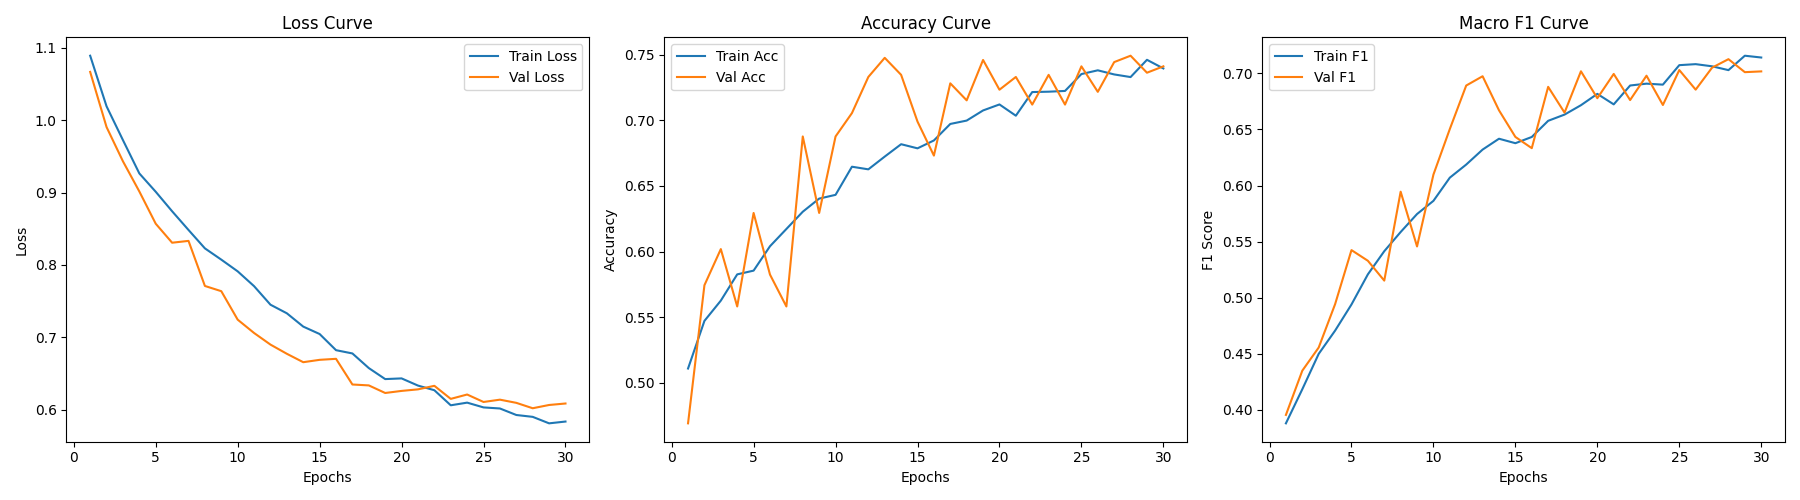

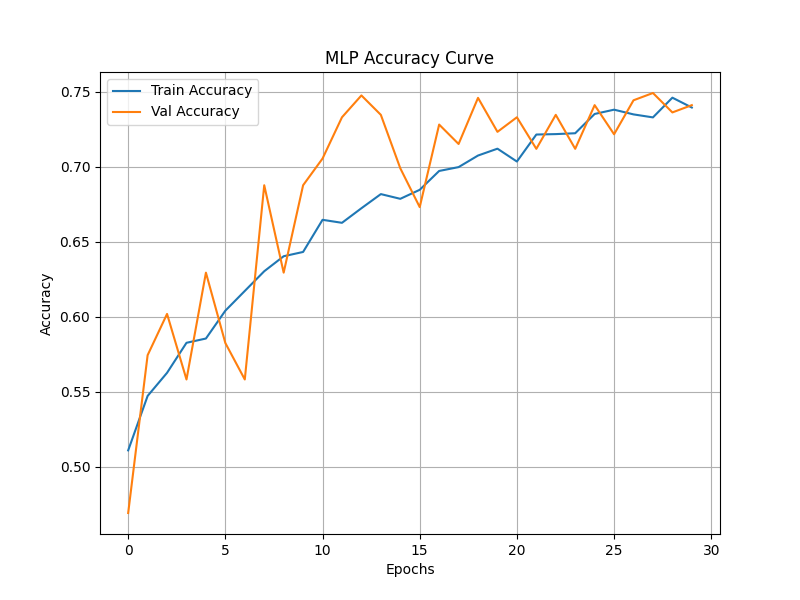

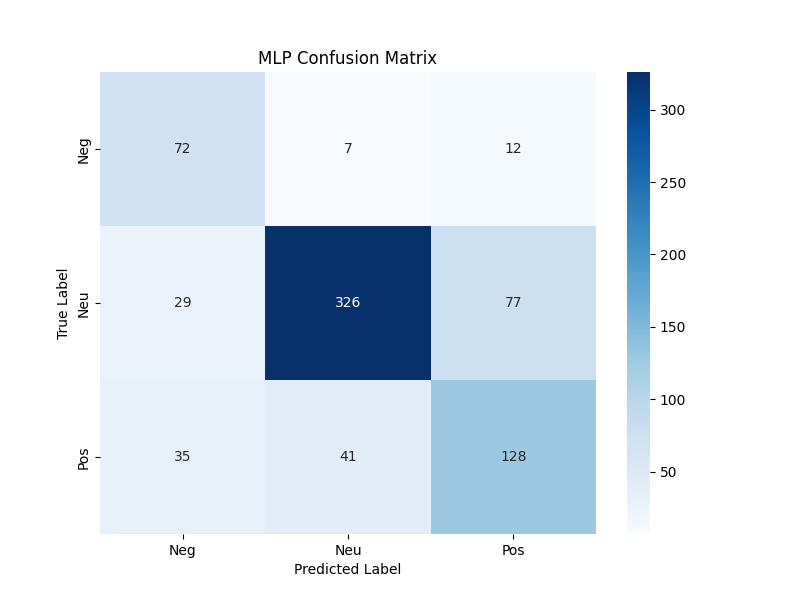

In [21]:
display(Image(filename = 'outputs/mlp_f1_learning_curves.png'))
display(Image(filename = 'outputs/mlp_accuracy_learning_curve.png'))
display(Image(filename = 'outputs/mlp_confusion_matrix.png'))

## Evaluating LSTM

Model performance metrics based on report outputs from train_sentiment_lstm_classifier.py
Loss shown in the graphs below, macro f1 exact score reported here

Test Macro F1 Score: 0.7297
\Classification Report:
               precision    recall  f1-score   support

    Negative        0.61      0.89      0.72        91
    Neutral         0.85      0.78      0.81       432
    Positive        0.66      0.64      0.65       204

    accuracy                            0.76       727
    macro avg       0.71      0.77      0.73       727
    weighted avg    0.77      0.76      0.76       727

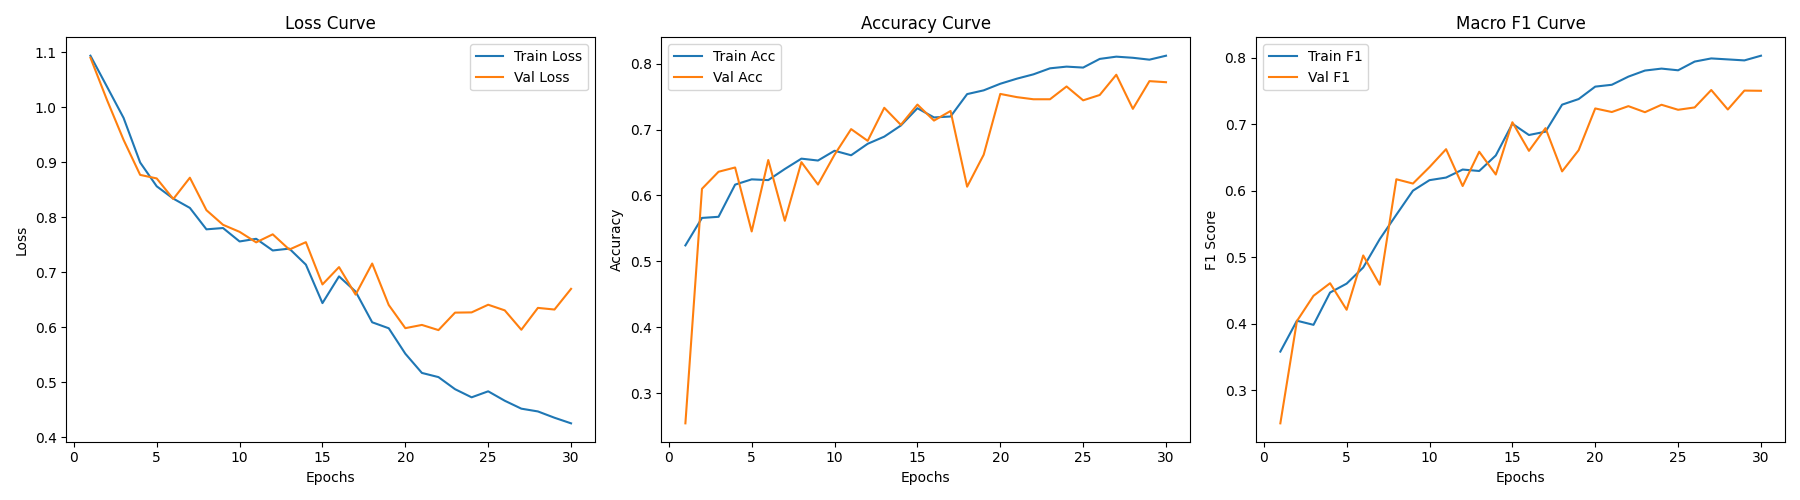

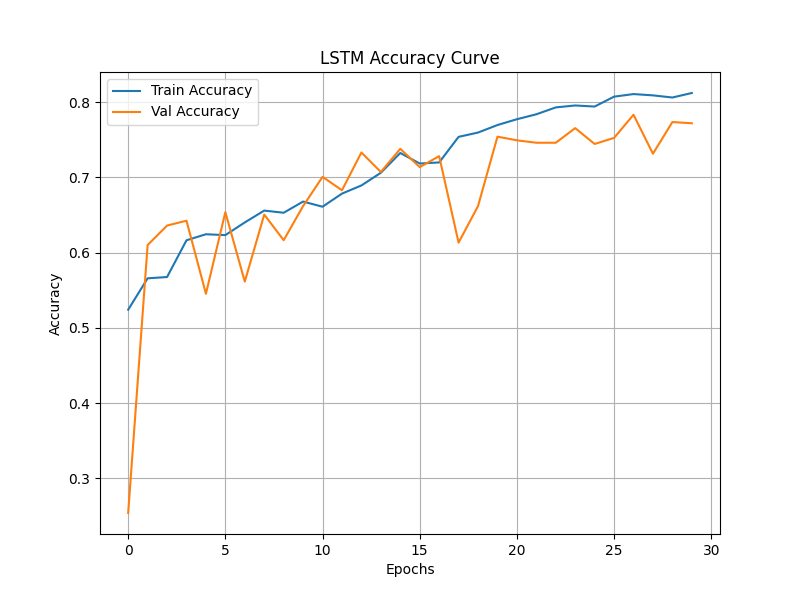

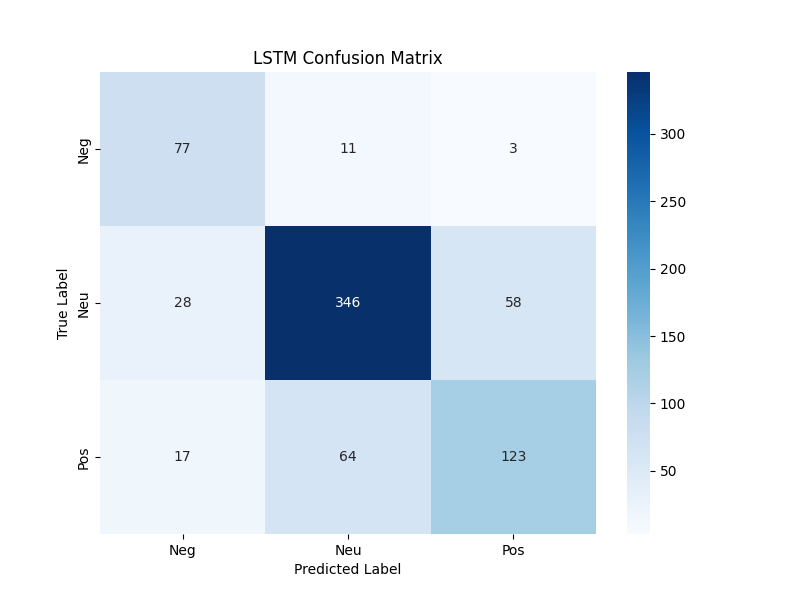

In [22]:
display(Image(filename = 'outputs/lstm_f1_learning_curves.png'))
display(Image(filename = 'outputs/lstm_accuracy_learning_curve.png'))
display(Image(filename = 'outputs/lstm_confusion_matrix.png'))

## Provided Models Eval Plots

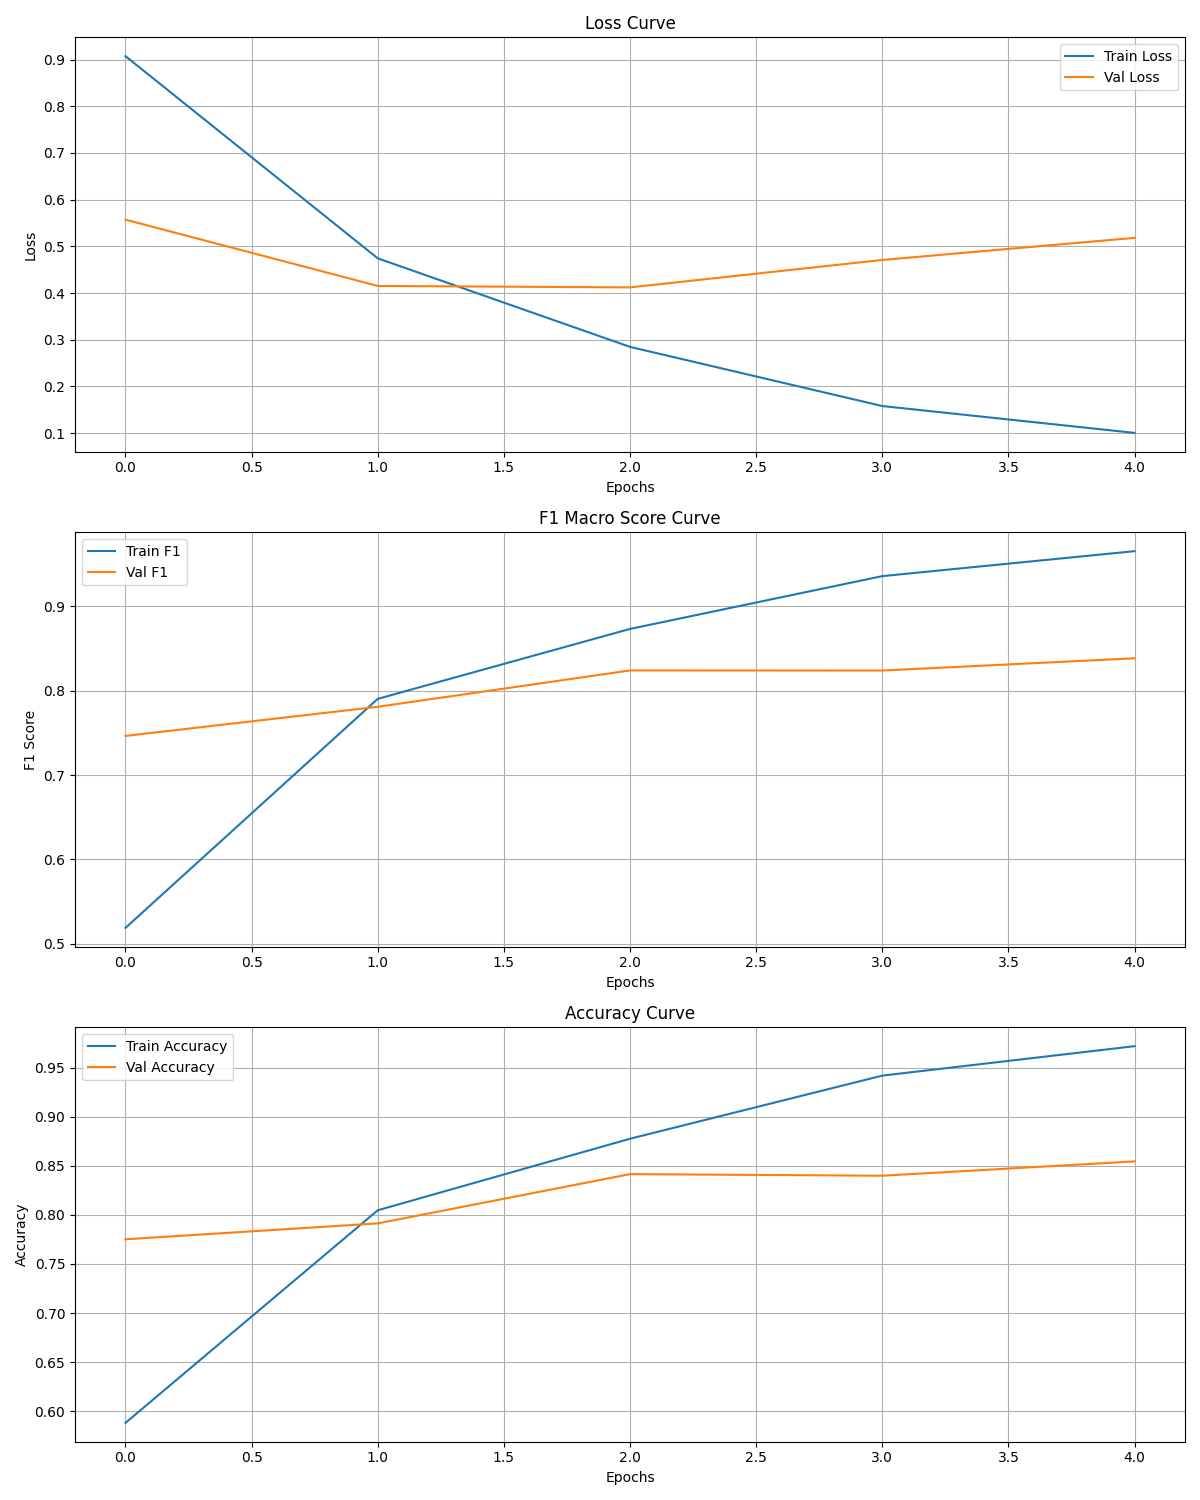

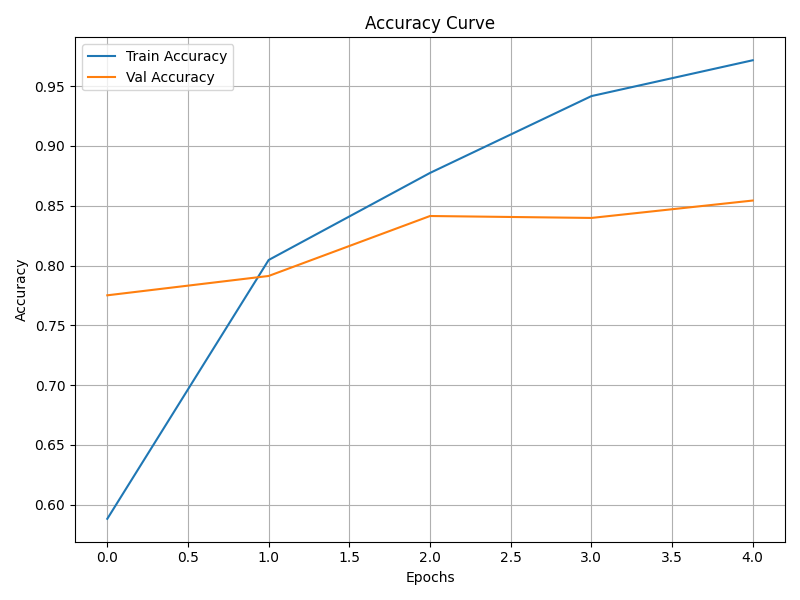

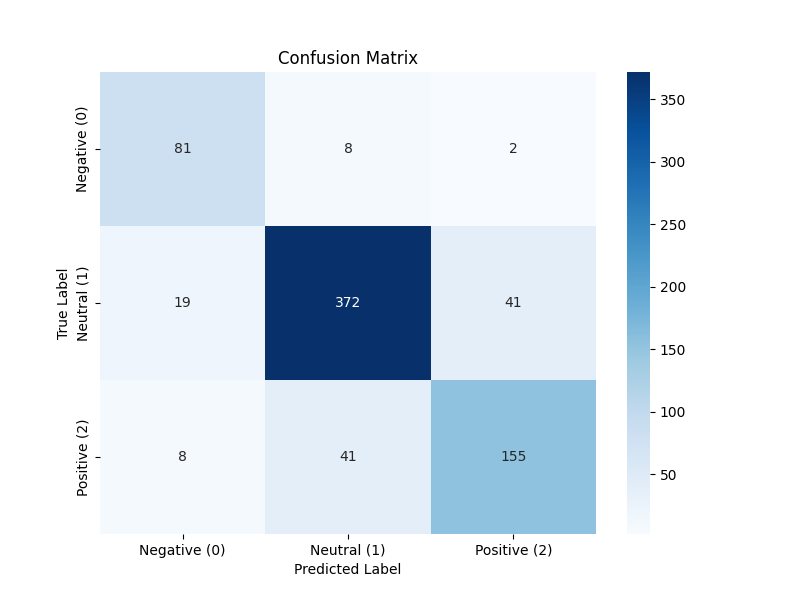

In [23]:
display(Image(filename = 'outputs/bert_f1_learning_curves.png'))
display(Image(filename = 'outputs/bert_accuracy_learning_curve.png'))
display(Image(filename = 'outputs/bert_confusion_matrix.png'))

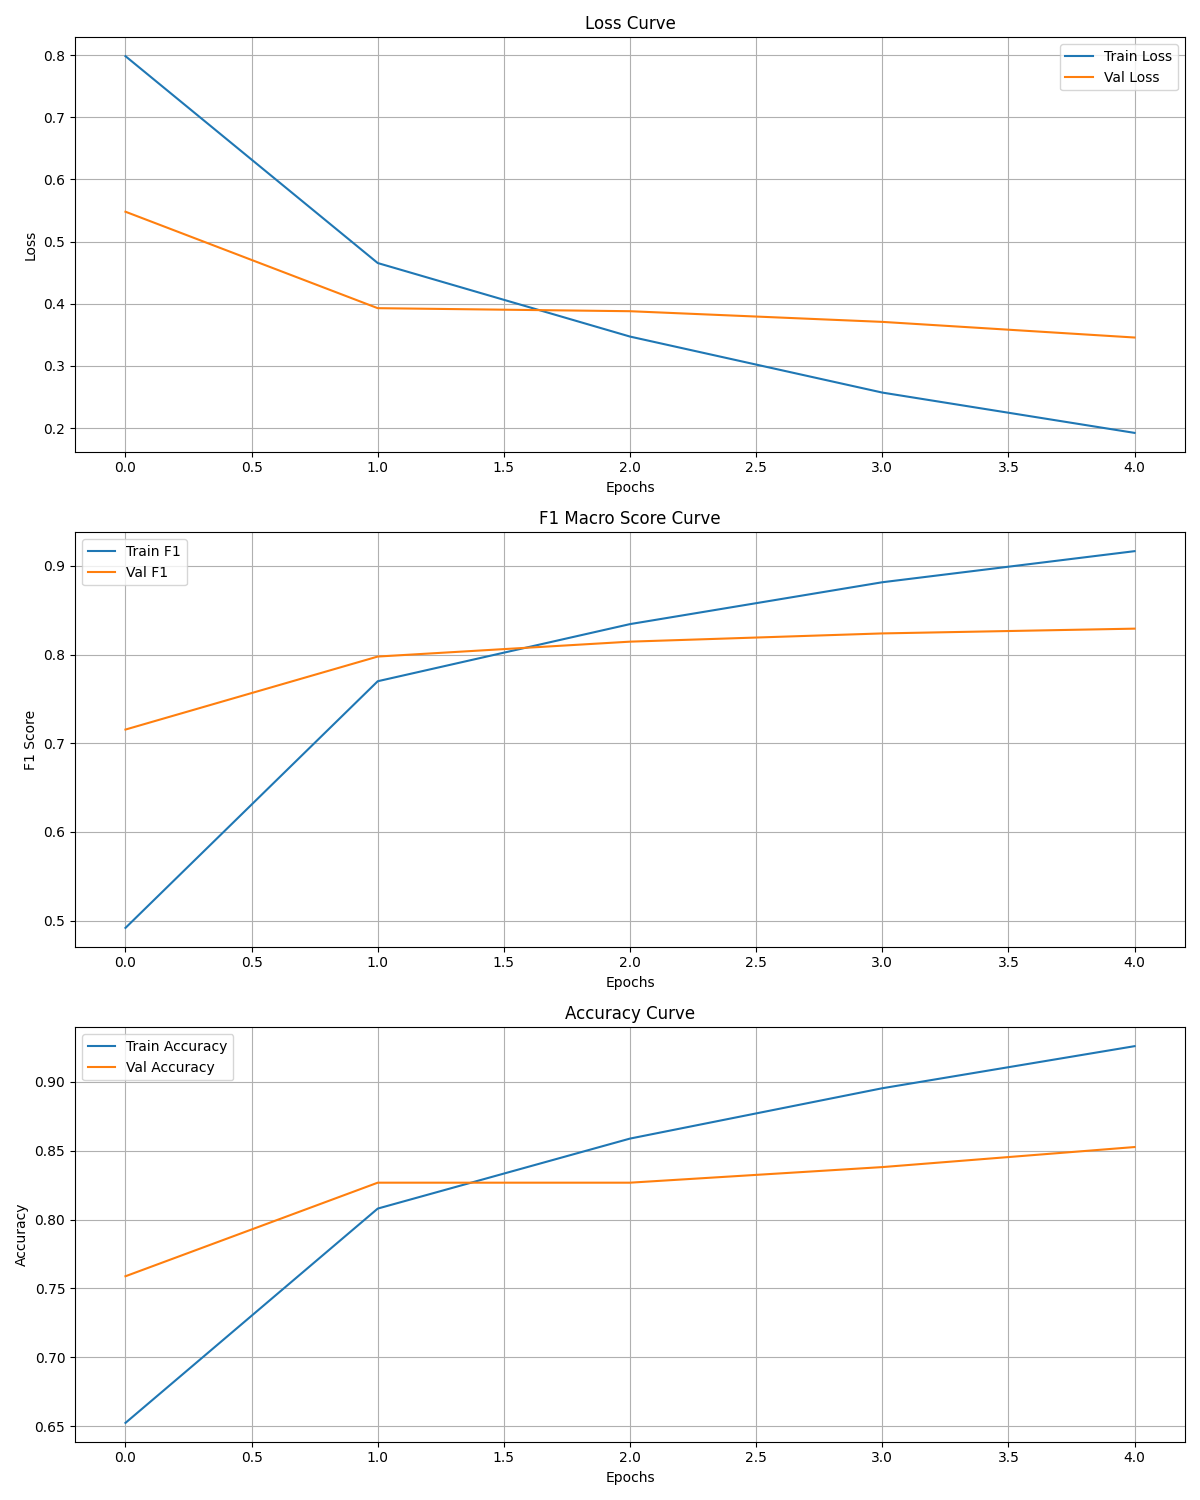

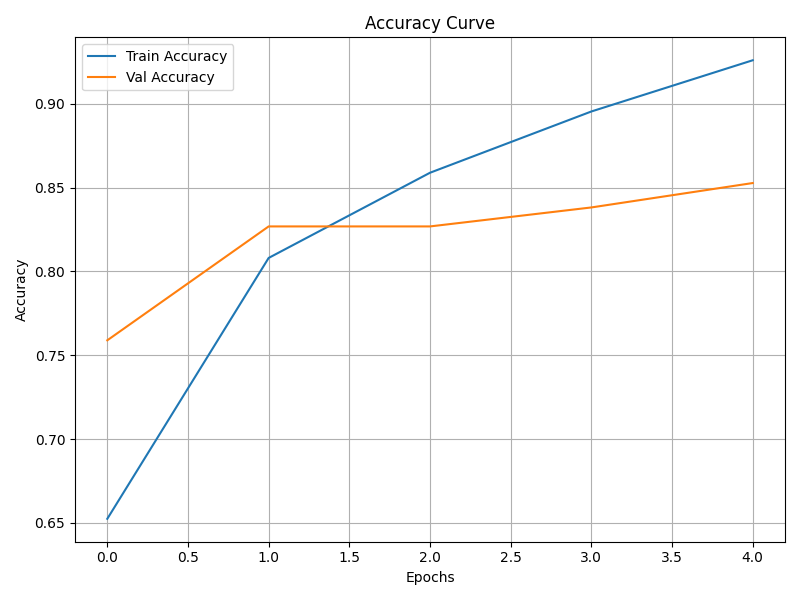

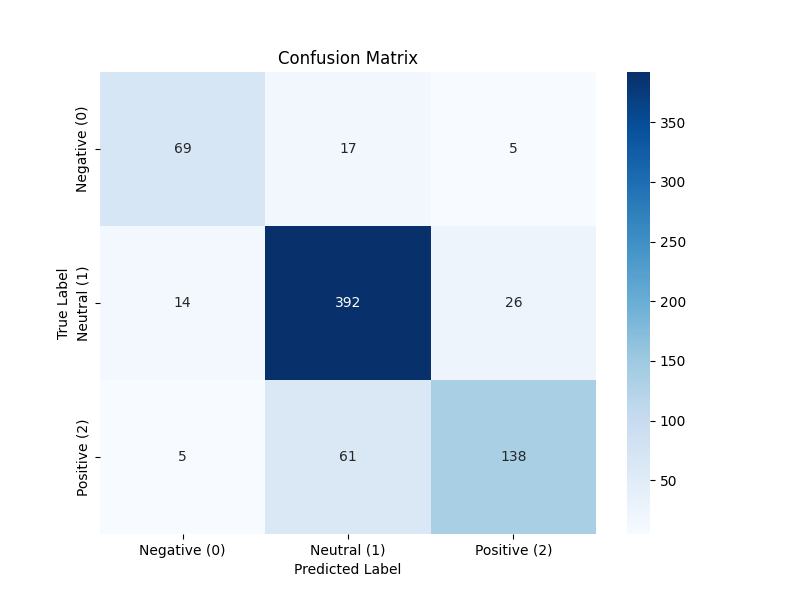

In [24]:
display(Image(filename = 'outputs/gpt_f1_learning_curves.png'))
display(Image(filename = 'outputs/gpt_accuracy_learning_curve.png'))
display(Image(filename = 'outputs/gpt_confusion_matrix.png'))

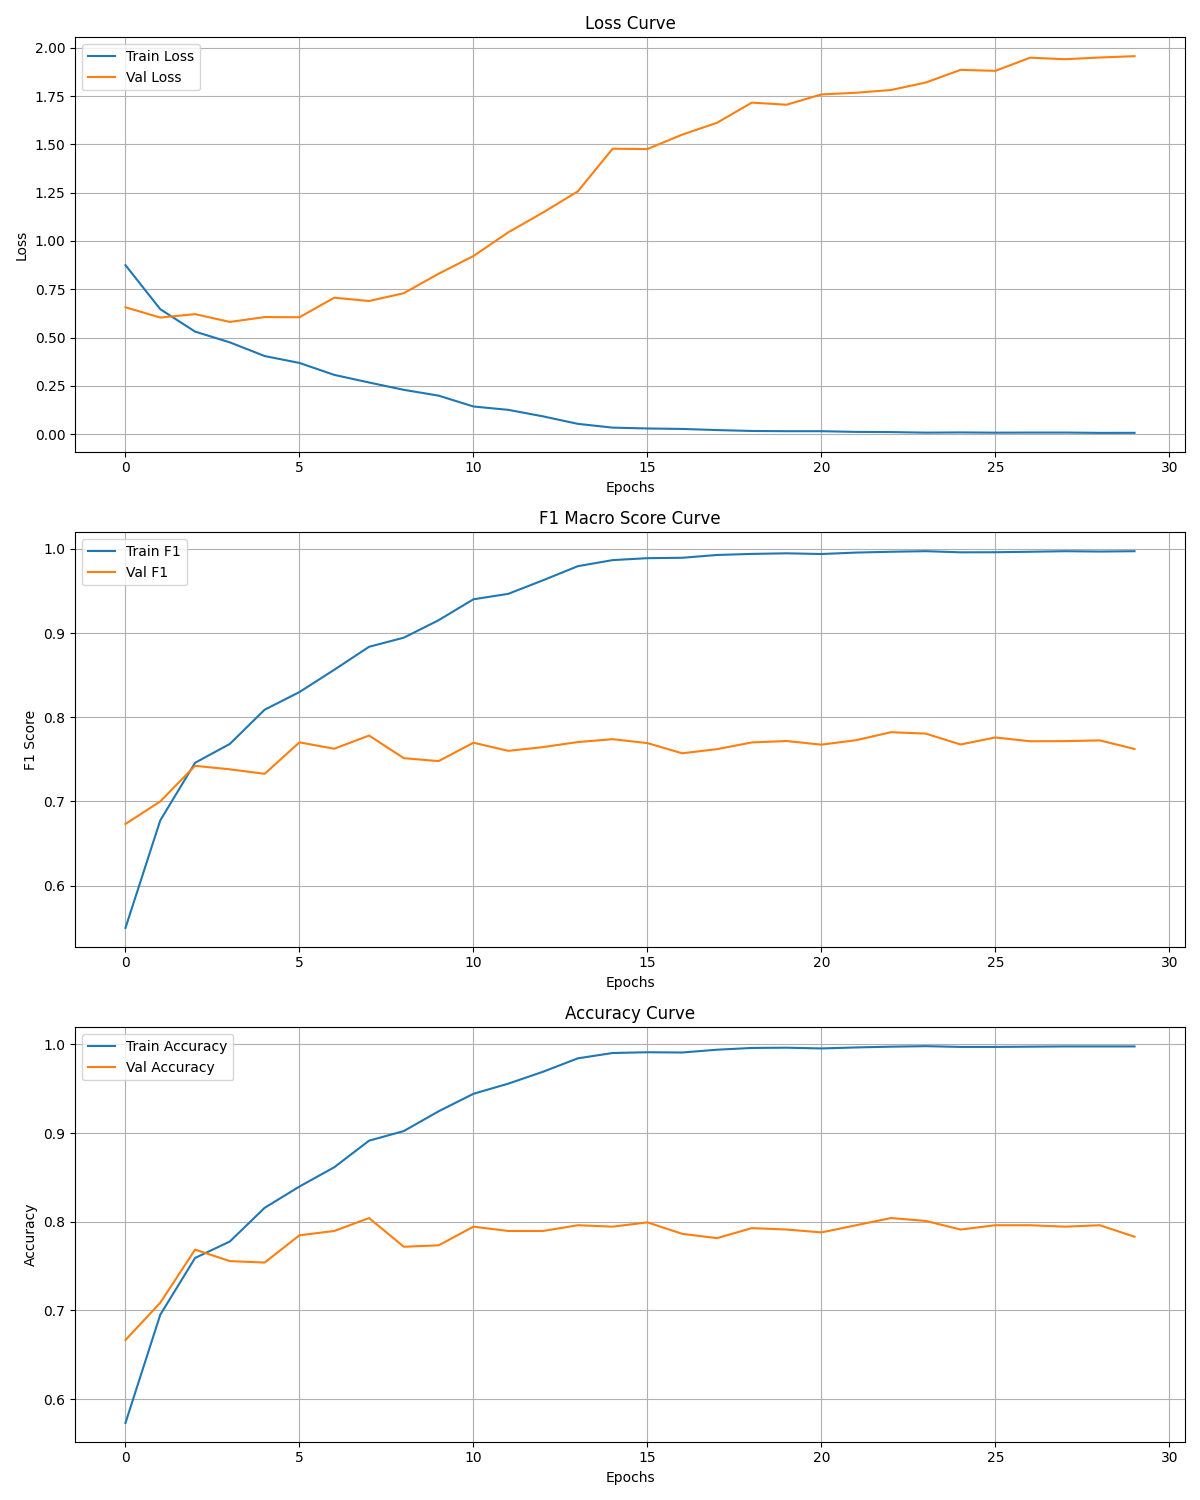

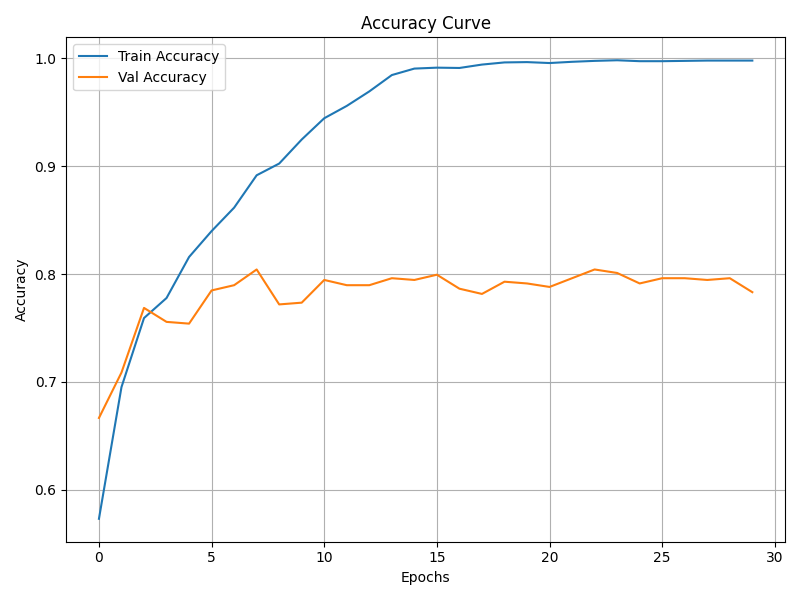

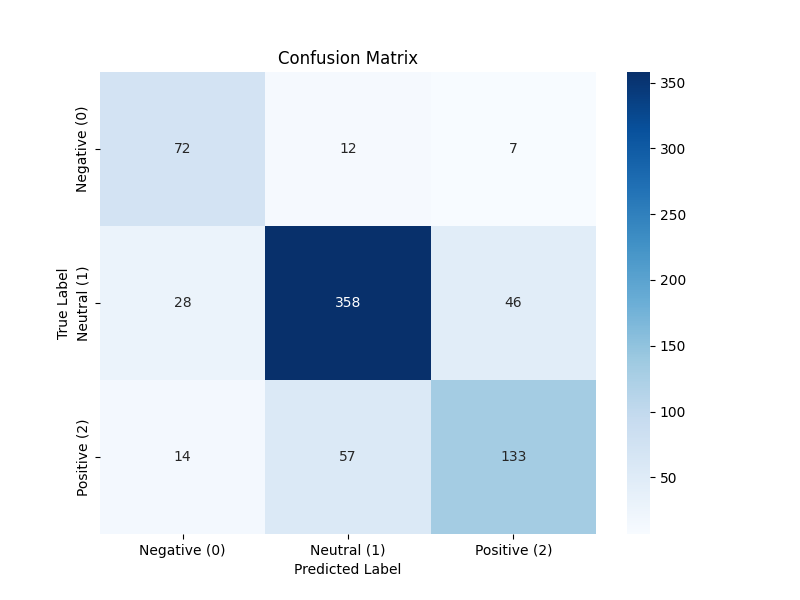

In [25]:
display(Image(filename = 'outputs/gru_f1_learning_curves.png'))
display(Image(filename = 'outputs/gru_accuracy_learning_curve.png'))
display(Image(filename = 'outputs/gru_confusion_matrix.png'))

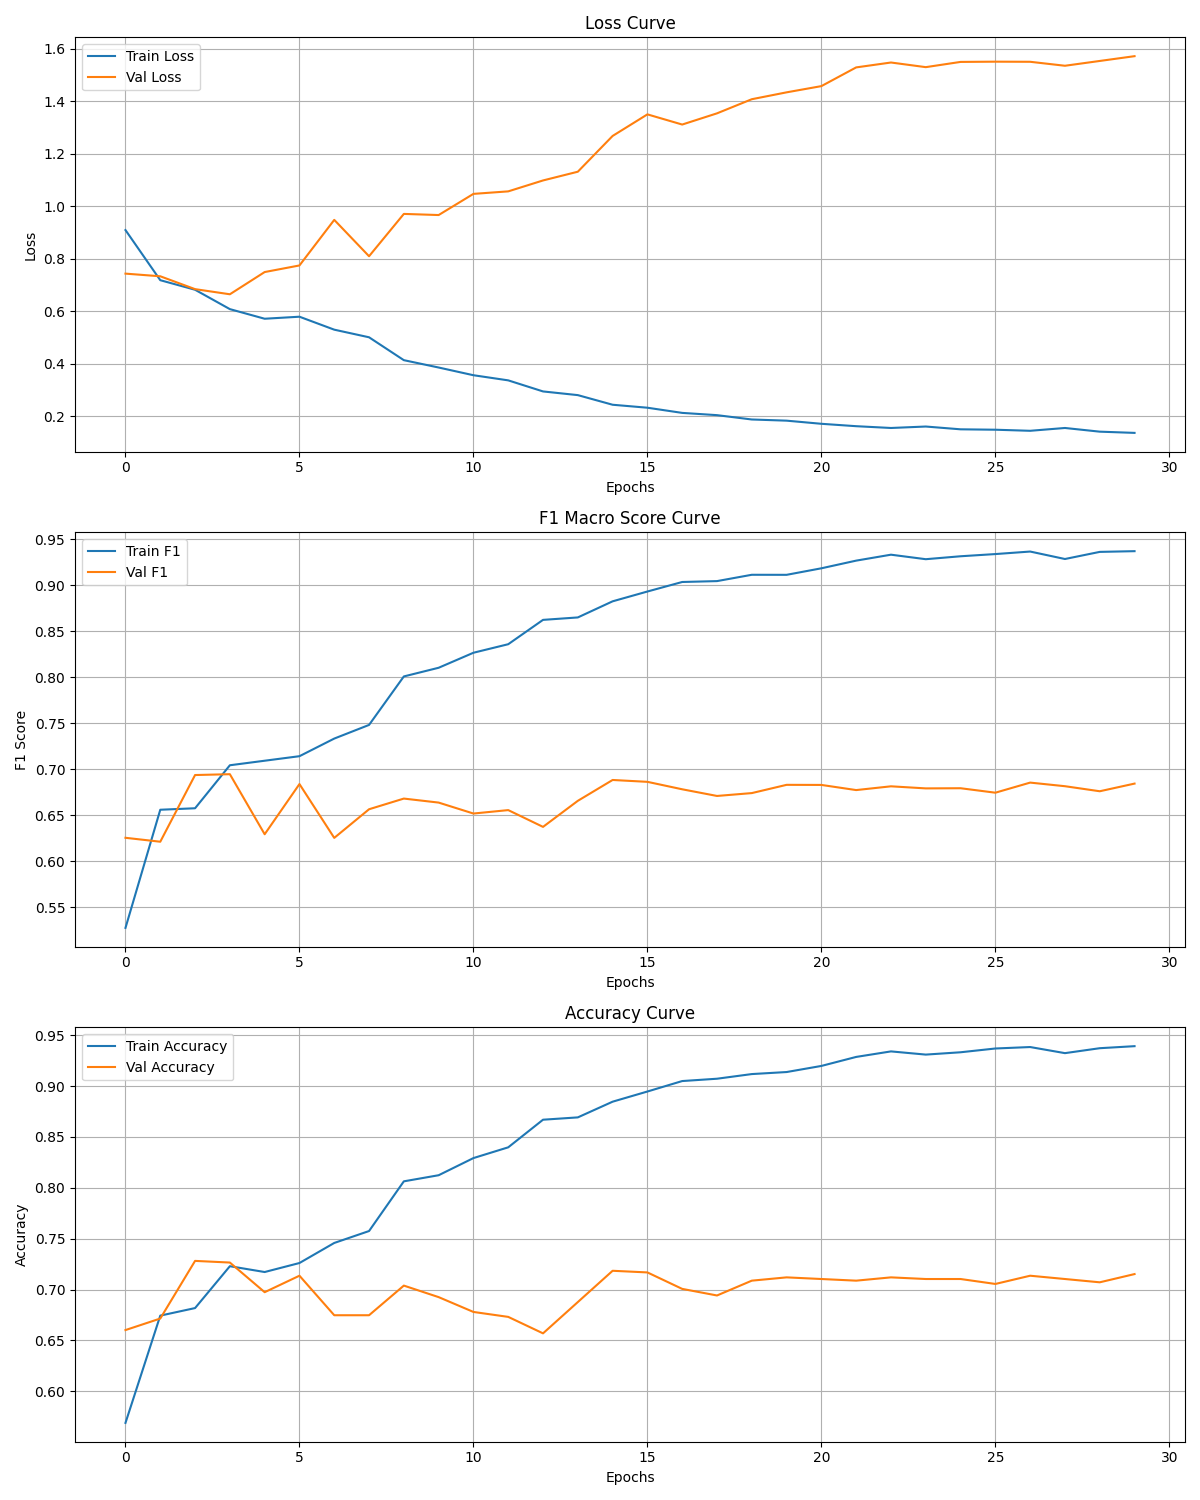

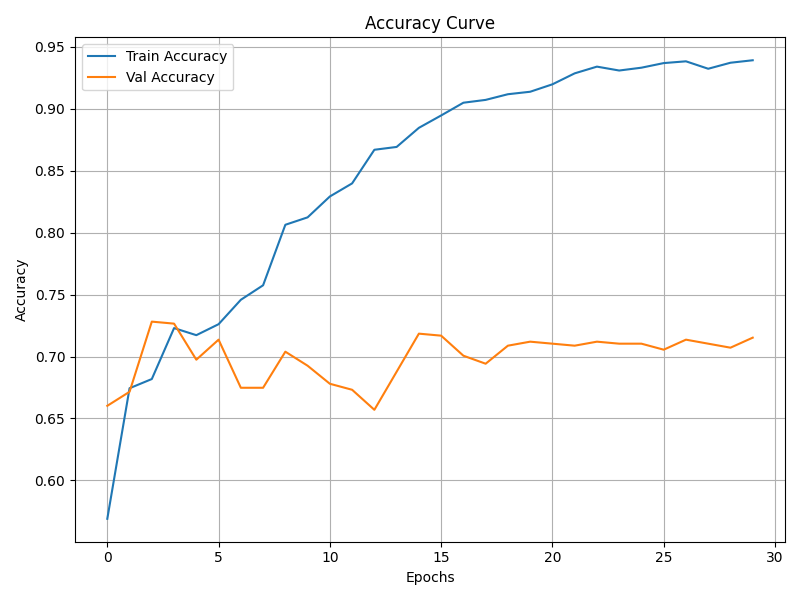

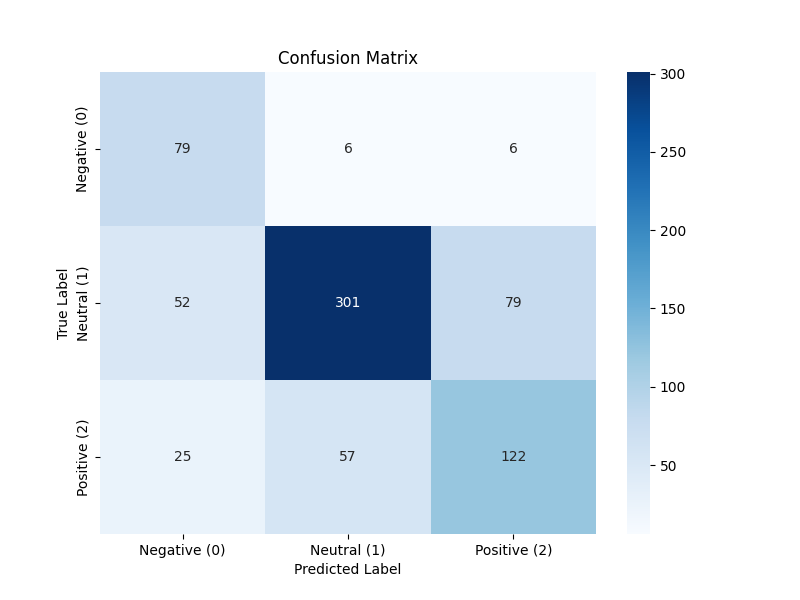

In [26]:
display(Image(filename = 'outputs/rnn_f1_learning_curves.png'))
display(Image(filename = 'outputs/rnn_accuracy_learning_curve.png'))
display(Image(filename = 'outputs/rnn_confusion_matrix.png'))

## Open-Ended Reflection Questions

1. Training Dynamics

    - By and large the models do not show significant signs of overfitting or  underfitting, other than in the final epochs for the LSTM validation loss and training loss diverge. Addressing overfitting in both models can be accomplished by increasing regularization through parameters like increasing dropout and increasing weight decay.

    - Using class weights slightly decreases training stability and improved final performance. The class weighting ensure the model prioritizes accurately classifiying minority classes which improves final performance as otherwise the model would only accurately perform on the majority class. By focusing on minority classes, small errors/gains lead to large swings in training loss making training slightly more unstable.
    
2. Model Performance and Error Analysis

    - The LSTM model generalized better to the test set as its macro f1 score of 0.7297 was higher than the MLP model's macro f1 score of 0.6689. 

    - The MLP model performed much worse on F1 score in the positive and negative classes compared to the neutral class. The LSTM performed worst on the positive class showing the positive class was the most frequently misclassified. The constant couching of negative and neutral terms in positive words in economic reporting can make clearly identifying positive statements difficult as positive words are not clear indicators of positive sentences.

3. Cross-Model Comparison

    - Mean-pooled FastText embeddings mean the MLP model can only analyze sentences as a word blob rather than a sequence of words with temporal order. Lacking sequence information means some information will always be lost before the MLP model can analyze.

    - LSTM's sequential processing gives the model a memory, through hidden states, of the word order allowing word meaning to modified by context which doesn't happen with the MLP.

    - The fine-tuned LLMs outperfomed the classical baselines as can be clearly seen in the train/val F1 score graphs. In terms of pretraining the fine-tuned LLMS were trained on a much larger corpus, including efforts to understand grammar and nuance as opposed to the other pretraining which only has a single vector for each word (only trying to understand word meaning). Architecturally, the LLMS have more sophisticated attention mechansims to better address contextual word weighting for increased understanding.

    - MLP, RNN, LSTM, GRU, GPT, BERT - from worst to least by test performance. BERT and GPT perform the best due to transformer architecture with BERT slightly outperforming GPT due to its bidirectionality. GRU/LSTM are able to access sequential information without significant vanishing gradient issues. RNN access sequential information but has issues with vanishing gradient. MLP does not have access to word order information.


## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red"> I used Gemini for help debugging issues I had with data loading and incompatibility issues with gensim loading. I also used Gemini to help better understand using the hidden state to predict classification in the LSTM model. I verified the information by rereading class notes and resources as well as rerunning files to ensure they ran properly. </font>
